In [1]:
import os 
os.getcwd()

'C:\\Users\\siddh'

In [2]:
os.chdir("C:/Users/siddh/OneDrive/Desktop/Data sets")

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
df1=pd.read_csv("challenger.csv")

In [4]:
df1

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [5]:
O_ring_failures=df1['O.ring.failures']

In [6]:
O_ring_failures

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [7]:
press=df1['pressure']

In [8]:
press

0      50
1      50
2      50
3      50
4      50
5      50
6     100
7     100
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: pressure, dtype: int64

Text(0.5, 0, 'pressure')

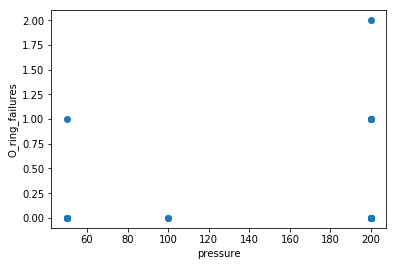

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.plot(press,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("pressure")

In [10]:
df1.corr()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [11]:
mean_O_ring_failures=df1['O.ring.failures'].mean()

In [12]:
mean_O_ring_failures

0.30434782608695654

<function matplotlib.pyplot.show(*args, **kw)>

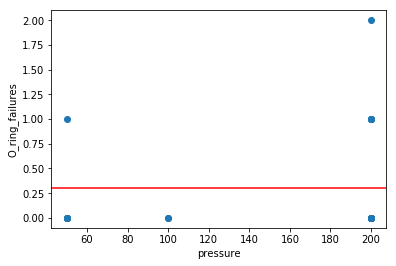

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.plot(press,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("pressure")
plt.axhline(mean_O_ring_failures,color='r',linestyle='-')
plt.show

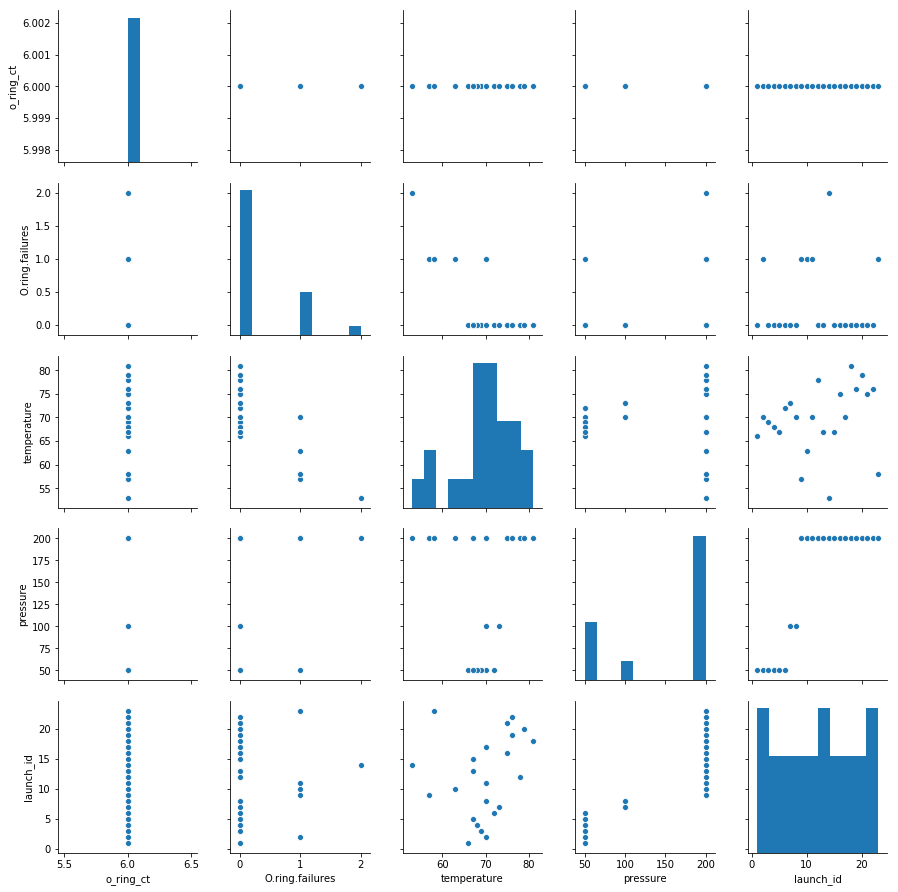

In [14]:
import seaborn as sns
sns.pairplot(df1)

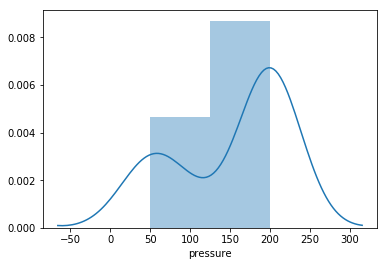

In [15]:
sns.distplot(df1['pressure'])

In [16]:
pressure=df1['pressure']

In [17]:
import statsmodels.api as sm
model1=sm.OLS(O_ring_failures,press).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00875
Time:                        09:30:57   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X=df1['pressure']
y=df1['O.ring.failures']

In [20]:
# split the data into trianing and test
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
X_train

4      50
2      50
18    200
6     100
7     100
1      50
14    200
0      50
15    200
22    200
21    200
9     200
8     200
12    200
11    200
5      50
Name: pressure, dtype: int64

In [23]:
X_test

20    200
17    200
3      50
13    200
19    200
16    200
10    200
Name: pressure, dtype: int64

In [24]:
y_train

4     0
2     0
18    0
6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [25]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
Name: O.ring.failures, dtype: int64

In [26]:
X_train =X_train.values.reshape((-1,1))

In [27]:
X_train

array([[ 50],
       [ 50],
       [200],
       [100],
       [100],
       [ 50],
       [200],
       [ 50],
       [200],
       [200],
       [200],
       [200],
       [200],
       [200],
       [200],
       [ 50]], dtype=int64)

In [28]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

In [29]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:',accuracy)

Accuracy of the model: 0.033538672142368164


In [30]:
#print coefficients 
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 0.08829568788501022
slope: [0.0011499]


In [32]:
X_test=X_test.values.reshape((-1,1))

In [33]:
X_test

array([[200],
       [200],
       [ 50],
       [200],
       [200],
       [200],
       [200]], dtype=int64)

In [34]:
#Predictiond from the model
predictions=model.predict(X_test)
print('predicted O.ring.failures:',predictions,sep='\n')

predicted O.ring.failures:
[0.31827515 0.31827515 0.14579055 0.31827515 0.31827515 0.31827515
 0.31827515]


In [35]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
Name: O.ring.failures, dtype: int64

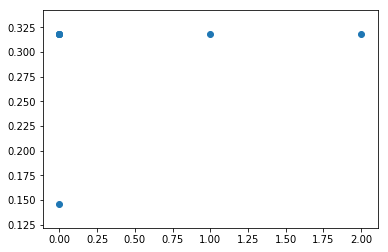

In [36]:
plt.scatter(y_test,predictions)

 # evaluating the model 

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
X_train=X_train.reshape(-1,1)
y_train_prediction=model.predict(X_train)


In [38]:
X_test=X_test.reshape(-1,1)
y_test_prediction=model.predict(X_test)

In [39]:
y_test_prediction

array([0.31827515, 0.31827515, 0.14579055, 0.31827515, 0.31827515,
       0.31827515, 0.31827515])

In [40]:
X_train

array([[ 50],
       [ 50],
       [200],
       [100],
       [100],
       [ 50],
       [200],
       [ 50],
       [200],
       [200],
       [200],
       [200],
       [200],
       [200],
       [200],
       [ 50]], dtype=int64)

In [41]:
y_train_prediction

array([0.14579055, 0.14579055, 0.31827515, 0.20328542, 0.20328542,
       0.14579055, 0.31827515, 0.14579055, 0.31827515, 0.31827515,
       0.31827515, 0.31827515, 0.31827515, 0.31827515, 0.31827515,
       0.14579055])

In [42]:
X_test

array([[200],
       [200],
       [ 50],
       [200],
       [200],
       [200],
       [200]], dtype=int64)

# model evaluation for training set

In [44]:
import numpy as np
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=r2_score(y_train,y_train_prediction)

In [47]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE IS []'),format(rmse_training)
print('R2 score is []'),format(r2_training)

The model performance for training set
--------------------------------------
RMSE IS []
R2 score is []


(None, '0.033538672142368164')

In [51]:
rmse_testing=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_testing=r2_score(y_test,y_test_prediction)
print("The model performance for testing set")
print("-------------------------------------")
print('Root mean squared error:'),format('rmse_testing')
print('R2_score:'),format ('r2_training')      

The model performance for testing set
-------------------------------------
Root mean squared error:
R2_score:


(None, 'r2_training')

Text(0, 0.5, 'O.ring.failures')

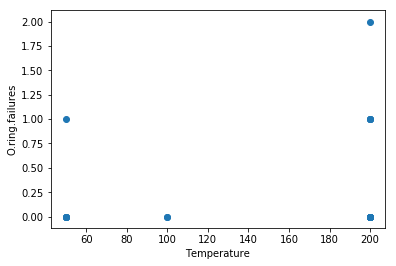

In [53]:
plt.scatter(X,y)
plt.xlabel('Temperature')
plt.ylabel('O.ring.failures')

In [61]:
X=X.reshape(-1,1)
y_predicted=model.predict(X)


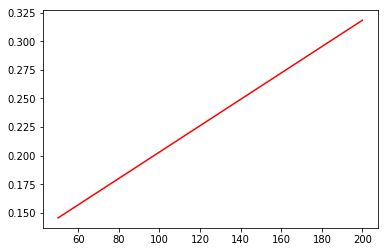

In [62]:
plt.plot(X,y_predicted,color='r')
plt.show()

In [63]:
X=df1[["temperature","pressure"]]
y=df1["O.ring.failures"]
model1=sm.OLS(y,X).fit()
predictions=model1.predict(X)



In [64]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.333
Date:                Wed, 15 May 2019   Prob (F-statistic):             0.0266
Time:                        10:16:20   Log-Likelihood:                -17.873
No. Observations:                  23   AIC:                             39.75
Df Residuals:                      21   BIC:                             42.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.0030      0.004     -0.745      0.465      -0.011       0.005
pressure        0.0031      0.002      1.842      0.080      -0.000       0.007
==============================================================================
Omnibus:                        8.717   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.616
Skew:                           1.239   Prob(JB):                       0.0366
Kurtosis:                       3.871   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

In [74]:
X_train



,temperature,pressure
6,73,100
7,70,100
1,70,50
14,67,200
0,66,50
15,75,200
22,58,200
21,76,200
9,63,200
8,57,200


In [75]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [76]:
features=X_train.iloc[:,:].values

In [77]:
features

array([[ 73, 100],
       [ 70, 100],
       [ 70,  50],
       [ 67, 200],
       [ 66,  50],
       [ 75, 200],
       [ 58, 200],
       [ 76, 200],
       [ 63, 200],
       [ 57, 200],
       [ 67, 200],
       [ 78, 200],
       [ 72,  50]], dtype=int64)

In [92]:
labels=y_train.iloc[:]

In [93]:
labels

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [95]:
X=features
y=labels
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y)

Accuracy of the model: 0.4967625599627807


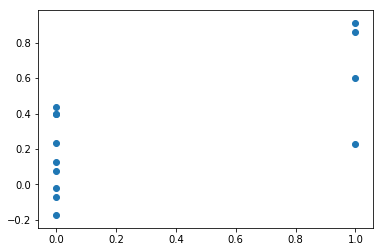

In [96]:
predictions=model.predict(X)
accuracy=model.score(X,y)
print('Accuracy of the model:',accuracy)
plt.scatter(y,predictions)

In [99]:
from  sklearn.metrics import mean_squared_error,r2_score
print('Slope:',model.coef_)
print('intercept:',model.intercept_)
print("\n")

Slope: [-5.18729135e-02  6.02614157e-05]
intercept: 3.857933005149098




In [104]:
import numpy as np

In [106]:
rmse=(np.sqrt(mean_squared_error(y,predictions)))
r2=r2_score(y,predictions)
print("The model performance")
print("---------------------")
print('RMSE IS []',format(rmse))
print('R2 score is []',format(r2))

The model performance
---------------------
RMSE IS [] 0.32741183231050536
R2 score is [] 0.4967625599627806
